# UW Data Science 350 - Winter 2017
## Assignment 6: Bayesian Analysis
## Dave Wine 8430191

In [1]:
require ('LearnBayes')
require ('repr')
require ('ggplot2')

Loading required package: LearnBayes
Warning message:
"package 'LearnBayes' was built under R version 3.3.2"Loading required package: repr
Warning message:
"package 'repr' was built under R version 3.3.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.2"

## Questions

Probability of texting.
You are asked to compute the probability that the driver of a car is texting at a specific intersection.
Nationally the cumulative probability that a driver is texting is:

    P = 0.5, at x = 0.1
    P = 0.75 at x = 0.3

You observe cars at a location three times and note the number of texting drivers:
    2 texting out of 20 drivers
    4 texting out of 20 drivers
    1 texting out of 20 drivers

Given these data:
1. Compute the Beta prior, and report the coefficients.
2. Plot the prior, likelihood and posterior three times as you update your belief based on collecting more data.
3. Simulate the final posterior distribution and do the following:
4. Plot the posterior with the 90% HDI shown
5. Report the upper and lower limits of the 90% HDI
6. Of the next hundred drivers what are the number of texting drivers in the 90% HDI?
7. Are the drivers in this area better or worse that the national figures indicate?

## Summary Results

1. The beta coeffcients are alpha=0.41, beta=1.73
2. See plots below
3. See below.
4. See below.
5. The upper and lower 90% HDI limits are 5 and 19 respectively.  We can be 90% certain that not less than 5 and not more than 19 drivers are texting at the intersection.
6. For a sample of 100 drivers, the 90% HDI limits are 4 and 20.
7. This is not necessarily an easy question to answer!  Running a sample of 100 drivers on the national statistics (such as they are given) indicates that between 0 and 55 drivers might be texting at any time, with 90% confidence, as compared to 4 and 20 above.  This sort of implies that local drivers are no better or worse than national drivers, since the distributions overlap. 

However, the PDF plots below indicate that is it most likely (8%) to see 11 out of every hundred local drivers texting, but very unlikely to see only one or more than 20.  So in that sense, local drivers are worse, since the chance of an accident would be expected to increase as more people are distracted.

## Analysis

Input the national probabilities:

In [2]:
beta.par <- beta.select(list(p=0.5, x=0.1), list(p=0.75, x=0.3))
beta.par ## The parameters of the Beta distribution

[1] 0.41 1.73

In [3]:
## Functions
beta.plot <- function(dist,success,failure){
  dist + c(success, failure)
  options(repr.plot.width=6, repr.plot.height=5)
  triplot(dist, c(success,failure))
  dist  
}

post.sim <- function (post, title){
  options(repr.plot.width=8, repr.plot.height=5)
  post.sample <- rbeta(10000, post[1], post[2])
  par(mfrow = c(1,2))
  quants = quantile(post.sample, c(0.05, 0.95))
  breaks = seq(min(post.sample), max(post.sample), length.out = 41)
  hist(post.sample, breaks = breaks, 
       main = paste('Distribution of ',title,'samples \n with 90% HDI'),
       xlab = 'Sample value',
       ylab = 'Density')
  abline(v = quants[1], lty = 3, col = 'red', lwd = 3)
  abline(v = quants[2], lty = 3, col = 'red', lwd = 3)
  qqnorm(post.sample)
  par(mfrow = c(1,1))
  quants
}

drivers.hund <- function(dist,n,title){
  s <- 0:n
  pred.probs <- pbetap(dist, n, s)
  plot(s, pred.probs, type="h", 
       main = paste('Prediction of ',title,'drivers texting at the intersection, ', as.character(n), 'trials'),
       xlab = 'Successes')
  discint(cbind(s, pred.probs), 0.90)
  
  # This creates a CDF from the PDF. It's ugly from a programming standpoint, I know.
  dist.cdf <-rep(0,100)
  for (i in seq(1,n,1)){
    for (j in seq(1,i,1)) {
      dist.cdf[i]<-dist.cdf[i]+pred.probs[j]
    }
  }
  
  plot(dist.cdf,main=paste('Cumulative probabilty of',title,'texting drivers'))
  
  list("HDI" = discint(cbind(s, pred.probs), 0.90),"CDF" = dist.cdf,"PDF"=pred.probs)
}

First, plot the prior:

[1] 0.41 1.73

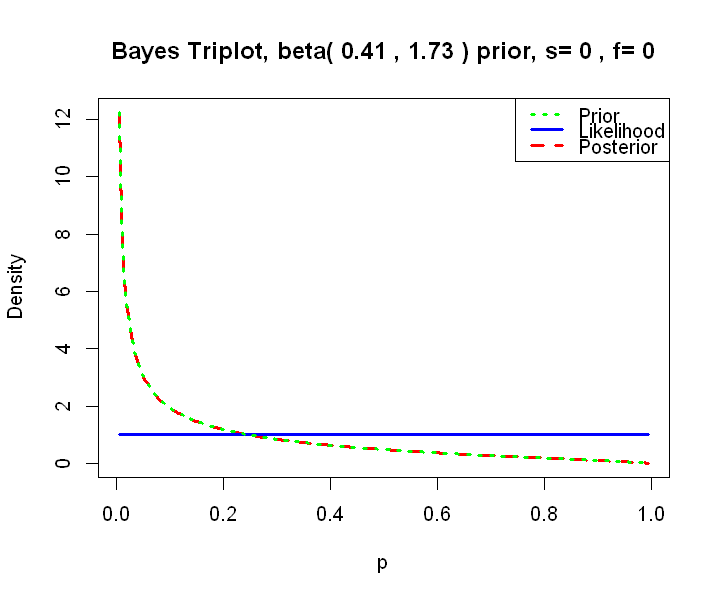

In [4]:
# Plot the Prior
beta.plot(beta.par,0,0)

Then plot the successive cumulative evidence

[1] 0.41 1.73

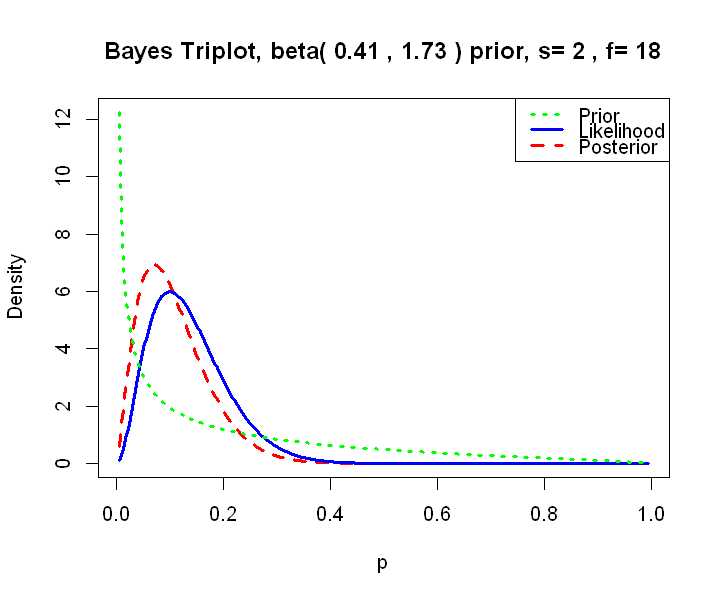

[1] 0.41 1.73

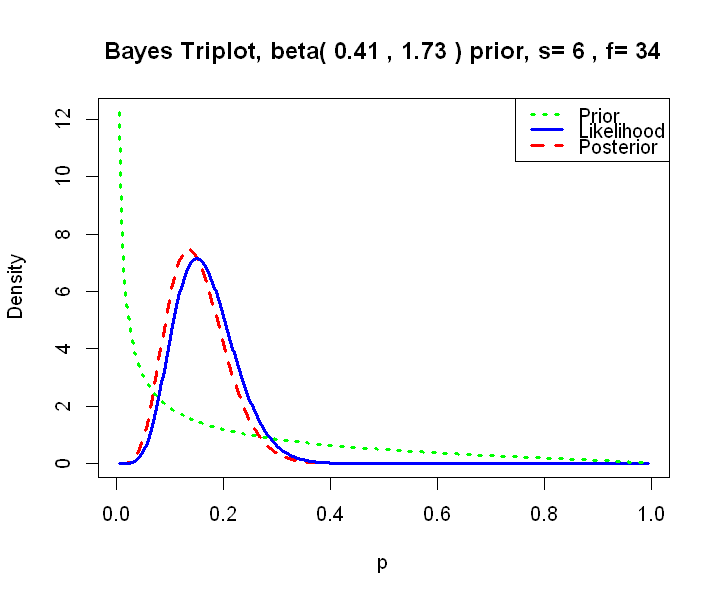

[1] 0.41 1.73

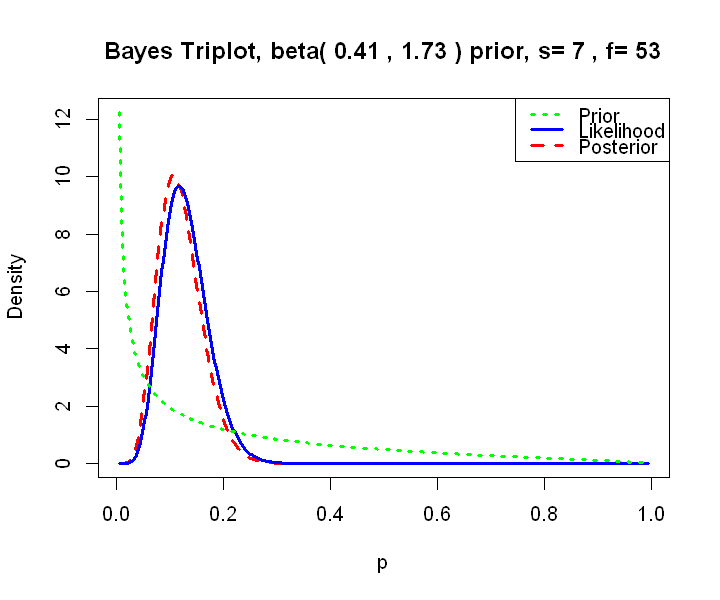

In [5]:
beta.plot(beta.par,2,18) # results for first 20
beta.plot(beta.par,6,34) # results after 40
beta.plot(beta.par,7,53) # results after 60

Simulate from the posterior and compute confidence intervals.  The posterior is just the number of successes relative to the total number of trials:

5%        95% 
0.05849696 0.19228338

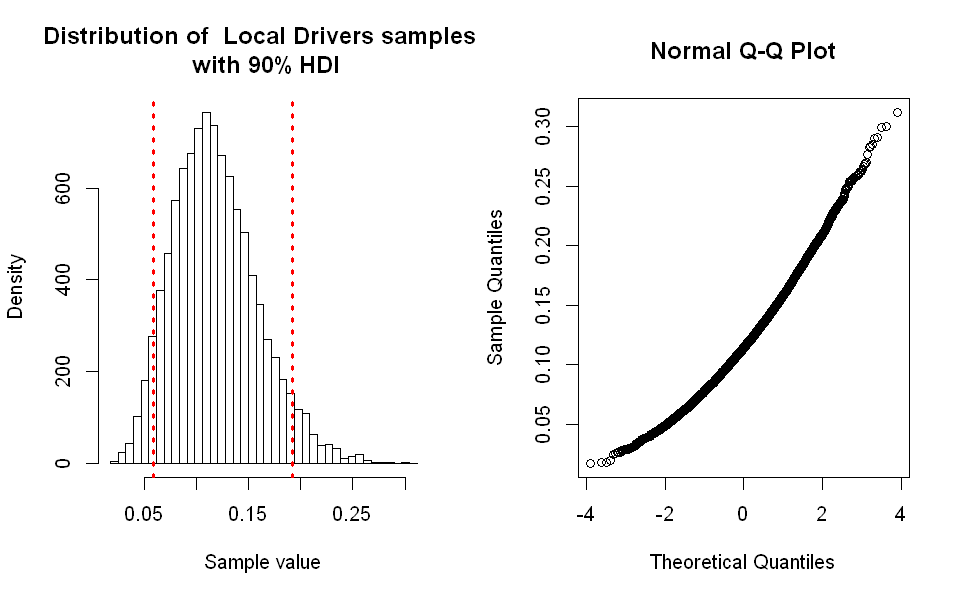

5%          95% 
0.0004407295 0.6852287924

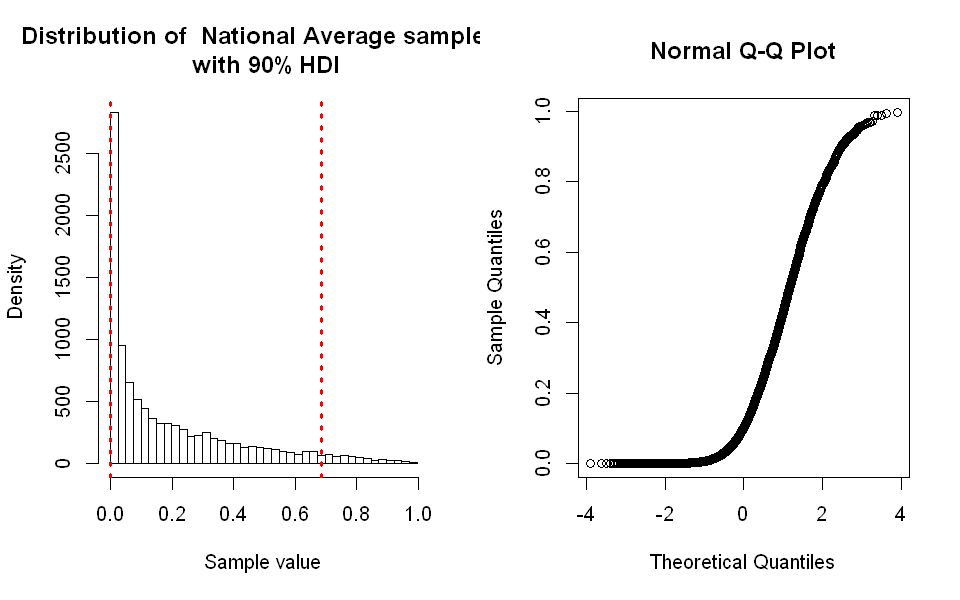

In [6]:
beta.post.par <- beta.par + c(2+4+1,18+16+19)

post.sim.local <- post.sim(beta.post.par, "Local Drivers")
post.sim.local
post.sim.natl <-post.sim(beta.par,"National Average")
post.sim.natl

The plot below shows that 7 successes out of 60 observations is near the most probable number - 7 drivers out of 60 are most likely to be texting

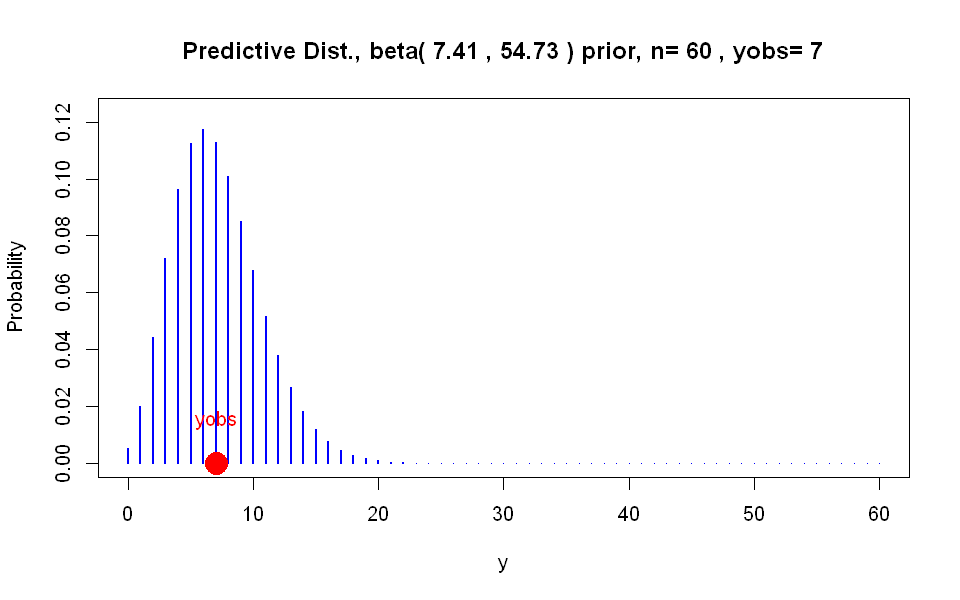

In [7]:
predplot(beta.post.par, 60, 7)

Now look at 100 drivers, both locally and nationally

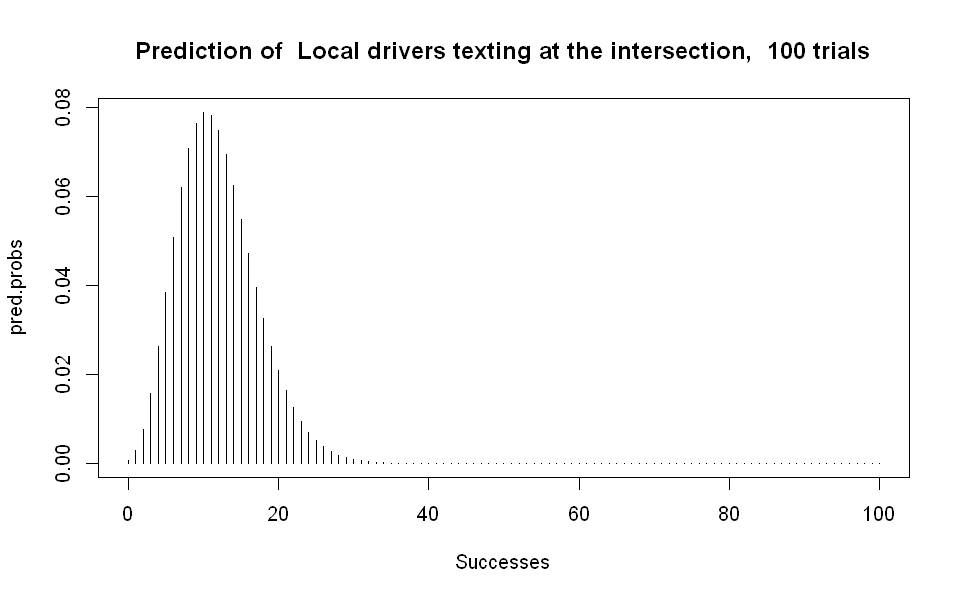

$prob
[1] 0.9098956

$set
 [1]  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

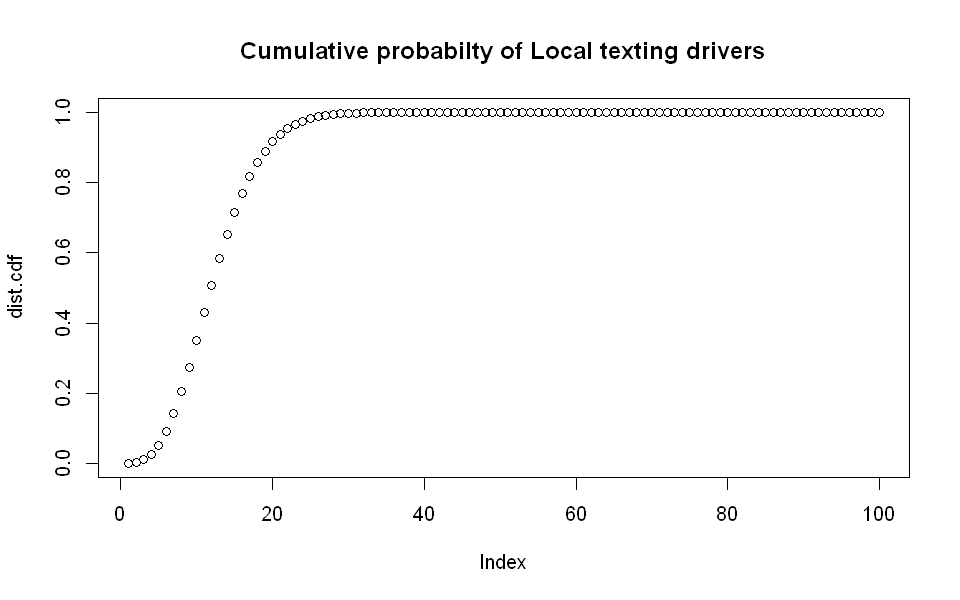

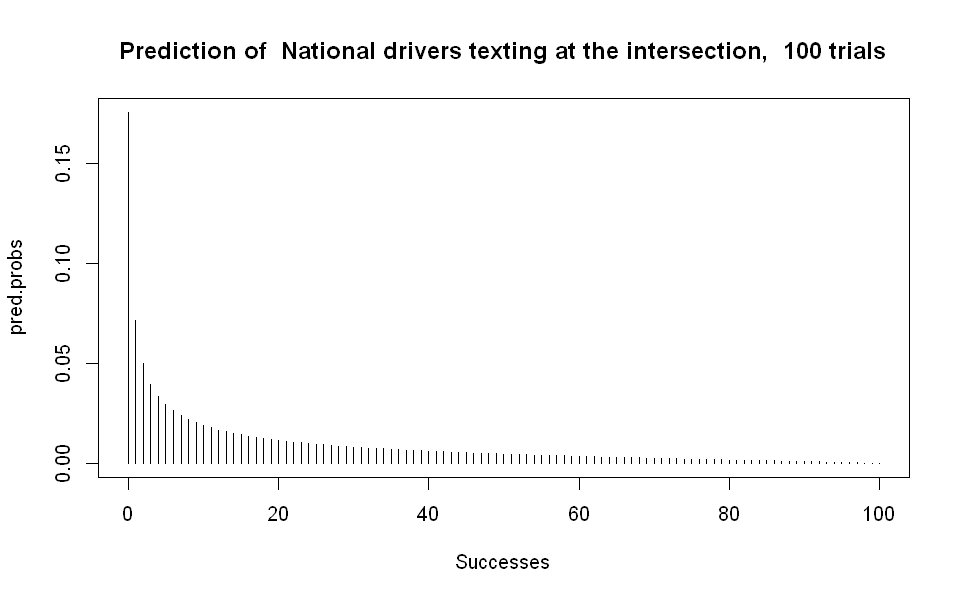

$prob
[1] 0.9038973

$set
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50 51 52 53 54 55

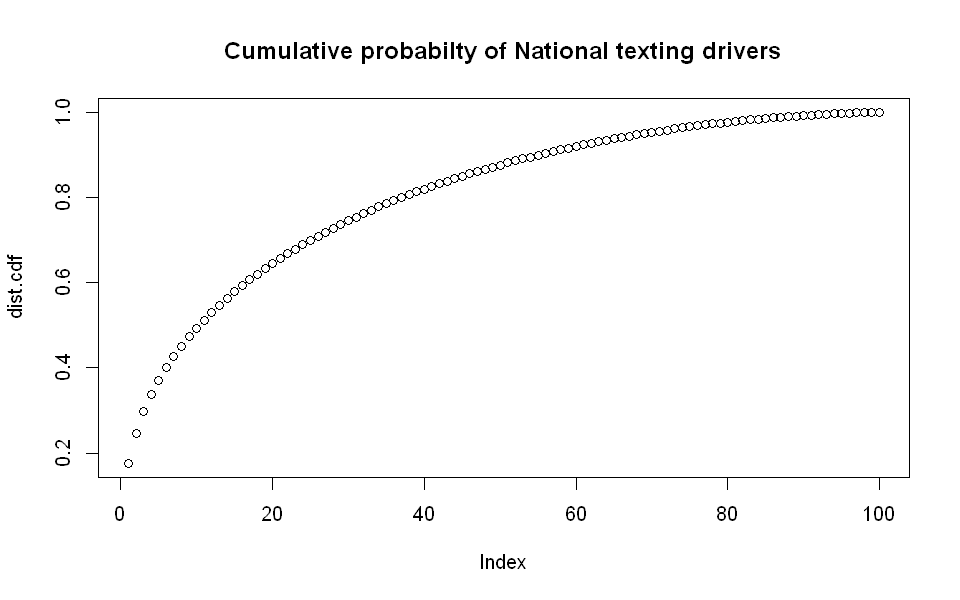

In [8]:
local.pred <- drivers.hund(beta.post.par,100,'Local')
local.pred$HDI
natl.pred <- drivers.hund(beta.par,100,'National')
natl.pred$HDI

Compare the PDFs:

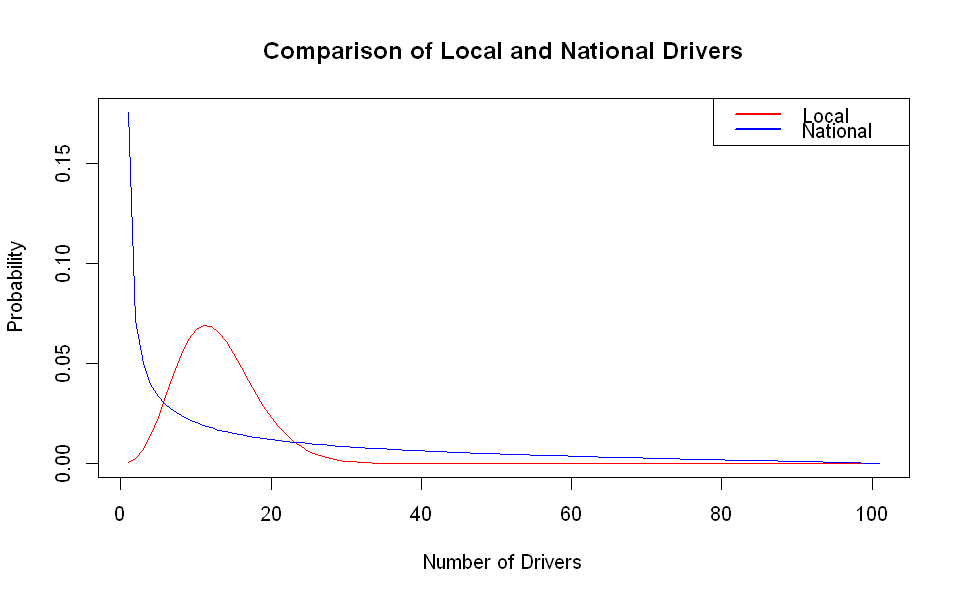

In [9]:
# Plot PDFs
plot(local.pred$PDF,type="l",col="red",xaxt="n",yaxt="n",xlab="",ylab="",ylim=c(0,.2))
par(new=TRUE)
plot(natl.pred$PDF,type='l',col ="blue",xlab="",ylab="")
title("Comparison of Local and National Drivers",xlab="Number of Drivers",ylab="Probability")
legend("topright",lwd=c(2,2),col=c("red","blue"),legend=c("Local","National"))

Locally, it is most likely (7.8%) that 11 drivers out of 100 are texting at any given time, but nationally, it is more  likely (17.5%) that one driver is texting.

Another view on this can be had by comparing the CDFs:

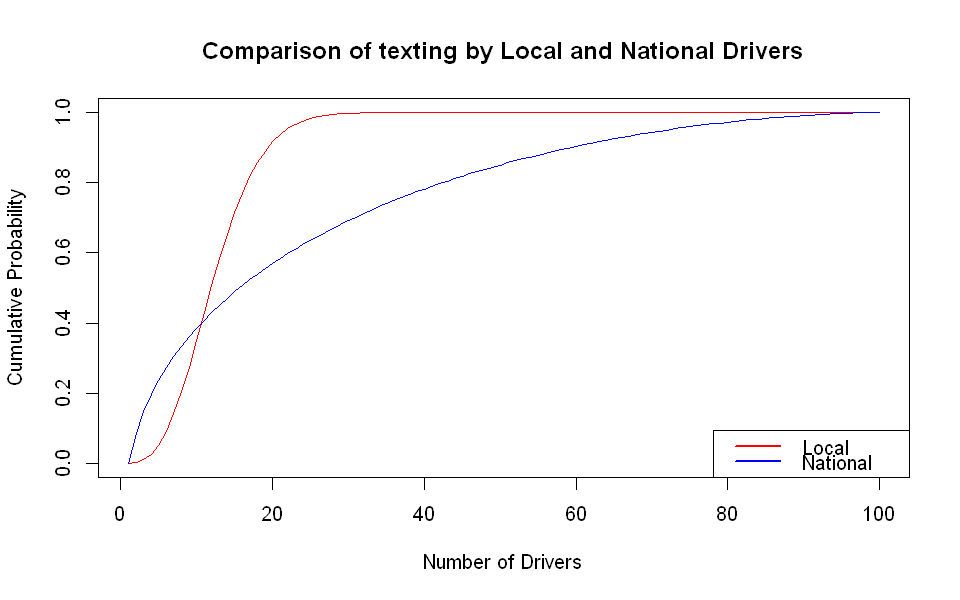

In [10]:
plot(local.pred$CDF,type="l",col="red",xlab="",ylab="")
par(new=TRUE)
plot(natl.pred$CDF,type='l',col ="blue",xaxt="n",yaxt="n",xlab="",ylab="")
title("Comparison of texting by Local and National Drivers",xlab="Number of Drivers",ylab="Cumulative Probability")
legend("bottomright",lwd=c(2,2),col=c("red","blue"),legend=c("Local","National"))

Based on this plot and the HDI numbers, I conclude that local drivers text less than nationally, since it is unlikely to see more than about 20 local drivers texting, while nationally, it is possible with 90% confidence to see up to about 55 drivers texting at any given time.  